In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [78]:
points = []
clusters = 2
means = [[1, 1], [-1, 1]]

n_clust = int(np.mean([random.random() * 100 for i in range(5)]))
c1_x = np.random.normal(means[0][0], 0.75, n_clust)
c1_y = np.random.normal(means[0][1], 0.75, n_clust)

c2_x = np.random.normal(means[1][0], 0.75, 100 - n_clust)
c2_y = np.random.normal(means[1][1], 0.75, 100 - n_clust)

p = [(c1_x, c1_y), (c2_x, c2_y)]


    

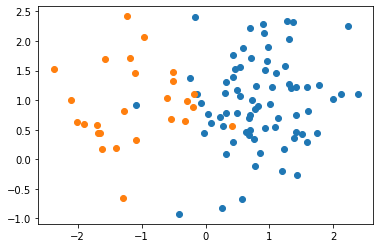

In [79]:
for i in range(clusters):
    plt.scatter(p[i][0], p[i][1], label = i)

plt.show()

In [80]:
for clust in range(clusters):
    c_x = p[clust][0]
    c_y = p[clust][1]
    for i in range(len(c_x)):
        x = c_x[i]
        y = c_y[i]
        norm = np.sqrt((x**2) + (y**2))
        c_x[i] = x / norm
        c_y[i] = y / norm
        

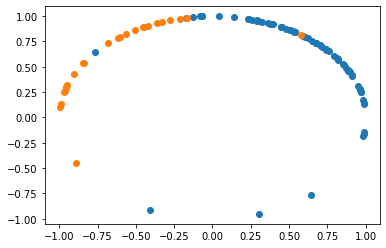

In [81]:
for i in range(clusters):
    plt.scatter(p[i][0], p[i][1], label = i)

plt.show()

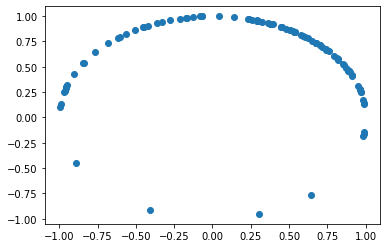

In [82]:
points = []
for i in range(clusters):
    for num in range(len(p[i][0])):
        points.append((p[i][0][num], p[i][1][num]))


plt.scatter([i[0] for i in points], [i[1] for i in points])
plt.show()
   

In [97]:
centroids_c = [random.choice(points) for i in range(clusters)]

for i in range(10):
    clusts_c = [[] for i in range(clusters)]
    for point in points:
        dists = []
        for centroid in centroids_c:
            dists.append(euc_dist(point, centroid))
        min_clus = np.argmin(dists)
        clusts_c[min_clus].append(point)
        
    for clust in range(clusters):
        centroids_c[clust] = get_centroid(clusts_c[clust])
        
        
    
        
        
            
        

In [101]:
import math
def euc_dist(x,y):
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
    return distance

In [102]:
def get_centroid(clust):
    cent_x = np.mean([i[0] for i in clust])
    cent_y = np.mean([i[1] for i in clust])
    return (cent_x, cent_y)

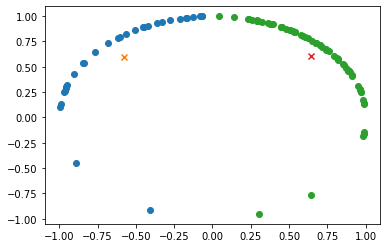

In [104]:
for i in range(clusters):
    plt.scatter([x for x,y in clusts_c[i]], [y for x,y in clusts_c[i]], label = i)
    plt.scatter([centroids_c[i][0]], [centroids_c[i][1]], marker = 'x', label = i)
plt.show()

In [105]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,execute,Aer

def get_q_dist(theta_t, theta_c):
    qced = QuantumCircuit(2, 2) 
    qced.h(0)
    qced.mct([0], 1)
    qced.ry(-theta_t, 1)
    qced.mct([0], 1)
    qced.barrier()
    qced.x(0)
    qced.ry(theta_t, 1)
    qced.mct([0], 1)
    qced.barrier()
    qced.ry(-theta_c, 1)
    qced.mct([0], 1)
    qced.ry(theta_c, 1)
    qced.h(0)
    qced.barrier()
    qced.measure(0,0)
    #display(qced.draw())
    return qced


def q_euc_dist(x, y):
    norm = np.linalg.norm([x[0], x[1], y[0], y[1]])
    theta_t = math.atan(x[1]/x[0])
    theta_c = math.atan(y[1]/y[0])
    qced = get_q_dist(theta_t, theta_c)
    job = execute(qced,Aer.get_backend('qasm_simulator'),shots=1024)
    counts = job.result().get_counts(qced)
    #print(counts)
    return norm * math.sqrt(2) * math.sqrt(counts['01'] / 1024 if '01' in counts else 0)

In [106]:
centroids_q = [random.choice(points) for i in range(clusters)]

for i in range(10):
    print(i)
    clusts_q = [[] for i in range(clusters)]
    for point in points:
        dists = []
        for centroid in centroids_q:
            dists.append(q_euc_dist(point, centroid))
        min_clus = np.argmin(dists)
        clusts_q[min_clus].append(point)
        
    for clust in range(clusters):
        centroids_q[clust] = get_centroid(clusts_q[clust])

0
1
2
3
4
5
6
7
8
9


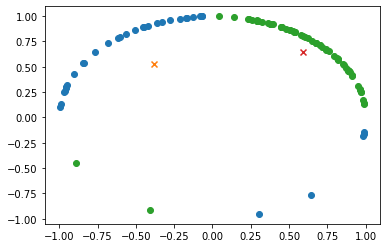

In [107]:
for i in range(clusters):
    plt.scatter([x for x,y in clusts_q[i]], [y for x,y in clusts_q[i]], label = i)
    plt.scatter([centroids_q[i][0]], [centroids_q[i][1]], marker = 'x', label = i)
plt.show()

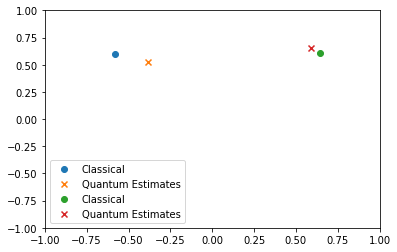

In [110]:
for i in range(clusters):
    plt.scatter([centroids_c[i][0]], [centroids_c[i][1]], marker = 'o', label = "Classical")
    plt.scatter([centroids_q[i][0]], [centroids_q[i][1]], marker = 'x', label = "Quantum Estimates")
    

plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.legend()
plt.show()